In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense ,Dropout
from keras.optimizers import Adam
import time

# remplacer les valeurs manquantes par le plus **frequent**

In [65]:
# Load the dataset
df = pd.read_csv('water_quality_dataset_most_frequent.csv')

In [66]:
# Split the dataset into input (X) and output (y) variables
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [129]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [130]:
# Standardize the input features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [131]:
# Reshape the input features for use with CNN
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [132]:
# Build the CNN model
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=1))
model.add(Conv1D(filters=64, kernel_size=2, activation='relu'))
model.add(MaxPooling1D(pool_size=1))
model.add(Conv1D(filters=128, kernel_size=2, activation='relu'))
model.add(MaxPooling1D(pool_size=1))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=1, activation='linear'))

In [133]:
# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_absolute_percentage_error',metrics=['mae','mse'])

In [134]:
import time

# Début du chrono
start_time_frequent = time.time()
# Enregistrer les temps de départ
step_times = []

# Définir un callback pour mesurer les temps de chaque étape
class TimingCallback(tf.keras.callbacks.Callback):
    def on_train_batch_begin(self, batch, logs=None):
        self.start_time = time.time()

    def on_train_batch_end(self, batch, logs=None):
        step_time = time.time() - self.start_time
        step_times.append(step_time)
# Train the model
history_frequent=model.fit(X_train, y_train, epochs=3000, batch_size=150, validation_data=(X_test, y_test),callbacks=[TimingCallback()])
# Fin du chrono
end_time_frequent = time.time()

Streaming output truncated to the last 5000 lines.
10/10 [==============================] - 0s 18ms/step - loss: 0.9885 - mae: 0.8977 - mse: 2.0110 - val_loss: 0.6916 - val_mae: 0.6399 - val_mse: 0.9342
Epoch 502/3000
10/10 [==============================] - 0s 20ms/step - loss: 1.1250 - mae: 1.0330 - mse: 2.8935 - val_loss: 0.6255 - val_mae: 0.6898 - val_mse: 1.7842
Epoch 503/3000
10/10 [==============================] - 0s 17ms/step - loss: 0.5851 - mae: 0.5598 - mse: 0.9515 - val_loss: 0.4981 - val_mae: 0.5379 - val_mse: 1.4579
Epoch 504/3000
10/10 [==============================] - 0s 18ms/step - loss: 0.7419 - mae: 0.7106 - mse: 1.7117 - val_loss: 0.8018 - val_mae: 0.7700 - val_mse: 2.2021
Epoch 505/3000
10/10 [==============================] - 0s 17ms/step - loss: 0.7959 - mae: 0.6799 - mse: 1.2901 - val_loss: 0.5066 - val_mae: 0.5339 - val_mse: 0.9256
Epoch 506/3000
10/10 [==============================] - 0s 21ms/step - loss: 0.6194 - mae: 0.5933 - mse: 1.2336 - val_loss: 0.691

In [135]:
# Calcul de la durée d'entraînement en secondes
training_time_frequent = end_time_frequent - start_time_frequent
# Affichage de la durée d'entraînement
print("Le temps d'entraînement est de", training_time_frequent, "secondes")
# Evaluate the model
loss_frequent = model.evaluate(X_test, y_test)
print('Mean absolute percentege error:', loss_frequent[0])
print('Mean absolute error:', loss_frequent[1])
print('Mean squared error:', loss_frequent[2])

Le temps d'entraînement est de 743.0980999469757 secondes
12/12 [==============================] - 0s 2ms/step - loss: 0.5045 - mae: 0.7194 - mse: 2.3025
Mean absolute percentege error: 0.5044997334480286
Mean absolute error: 0.7193524241447449
Mean squared error: 2.3025383949279785


In [136]:
# Predict the WQI for a new sample
new_sample = np.array([[7.5, 8.0, 300, 2.0, 0.5, 100, 2005]])
new_sample = scaler.transform(new_sample)
new_sample = new_sample.reshape((new_sample.shape[0], new_sample.shape[1], 1))
prediction = model.predict(new_sample)
print('Predicted WQI:', prediction[0][0])

1/1 [==============================] - 0s 176ms/step
Predicted WQI: 72.10155


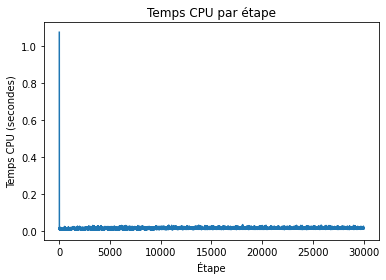

In [137]:
# Créer un graphe pour les temps CPU par epoch
import matplotlib.pyplot as plt

plt.plot(range(len(step_times)), step_times)
plt.xlabel('Étape')
plt.ylabel('Temps CPU (secondes)')
plt.title('Temps CPU par étape')
plt.show()

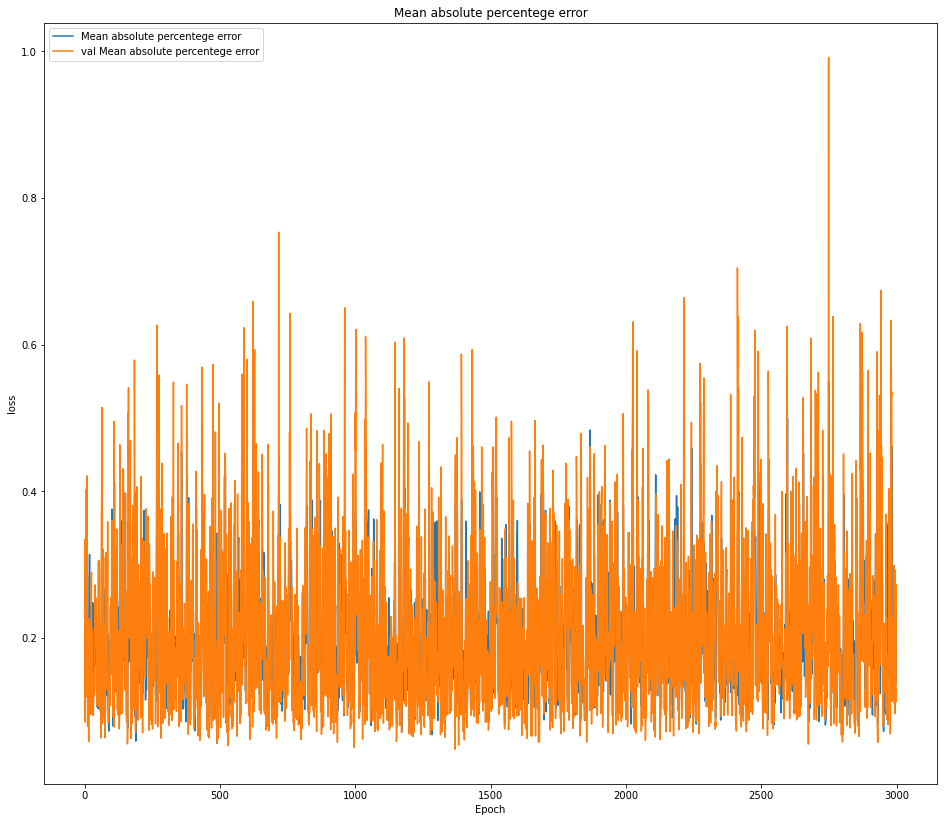

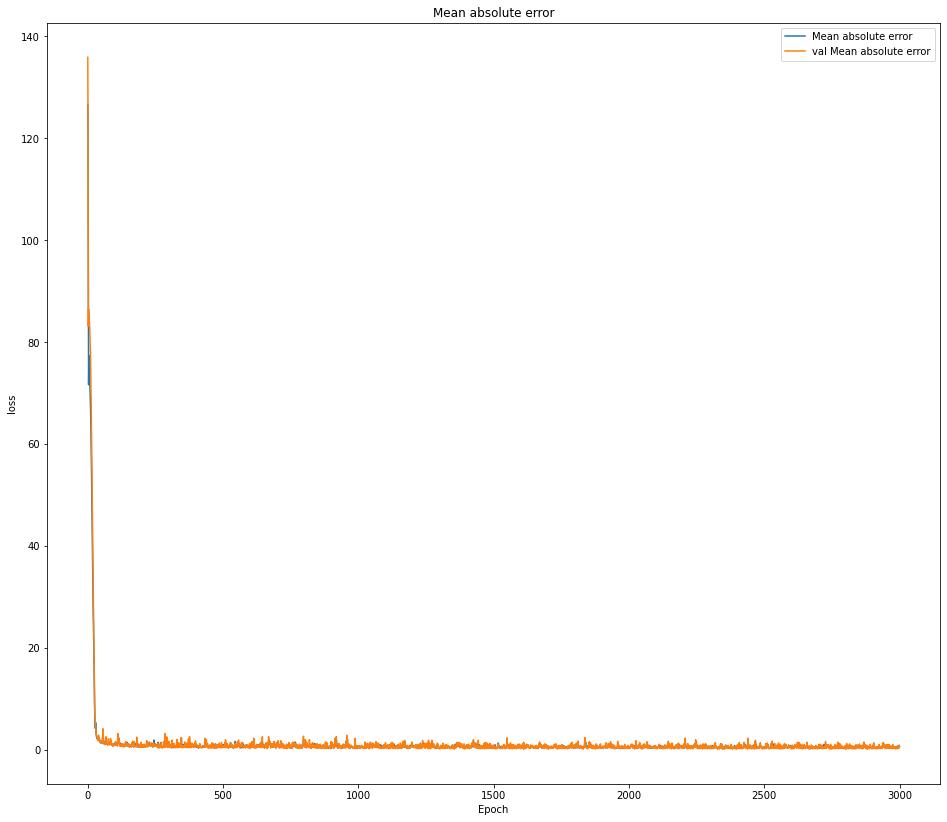

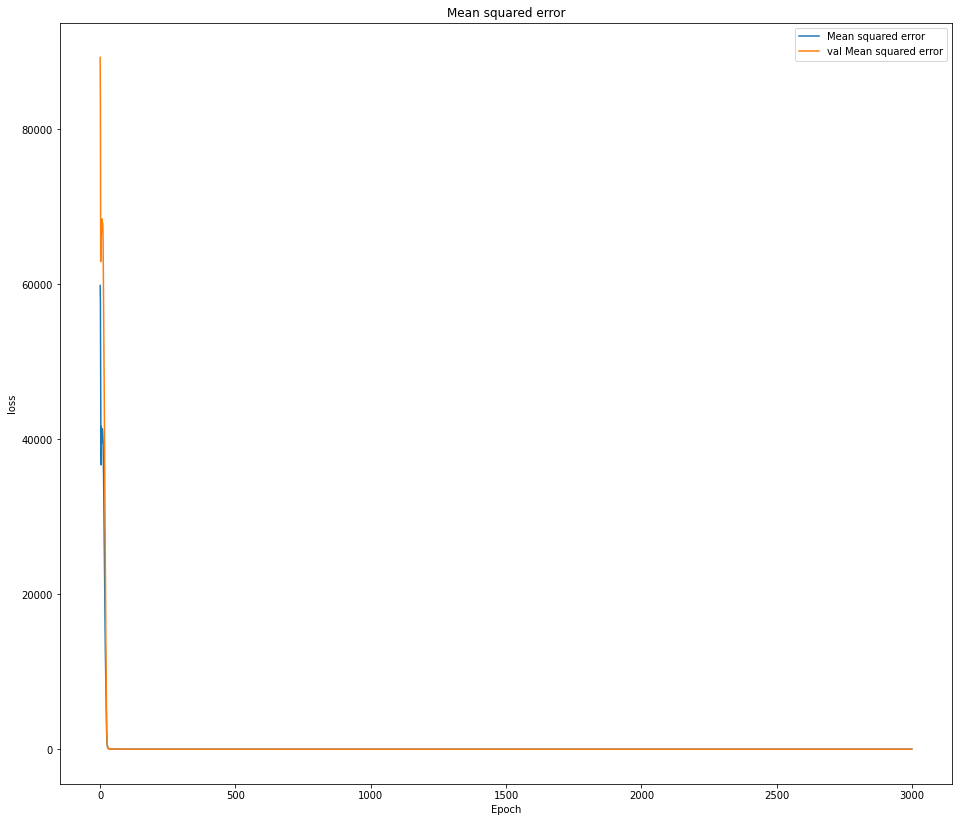

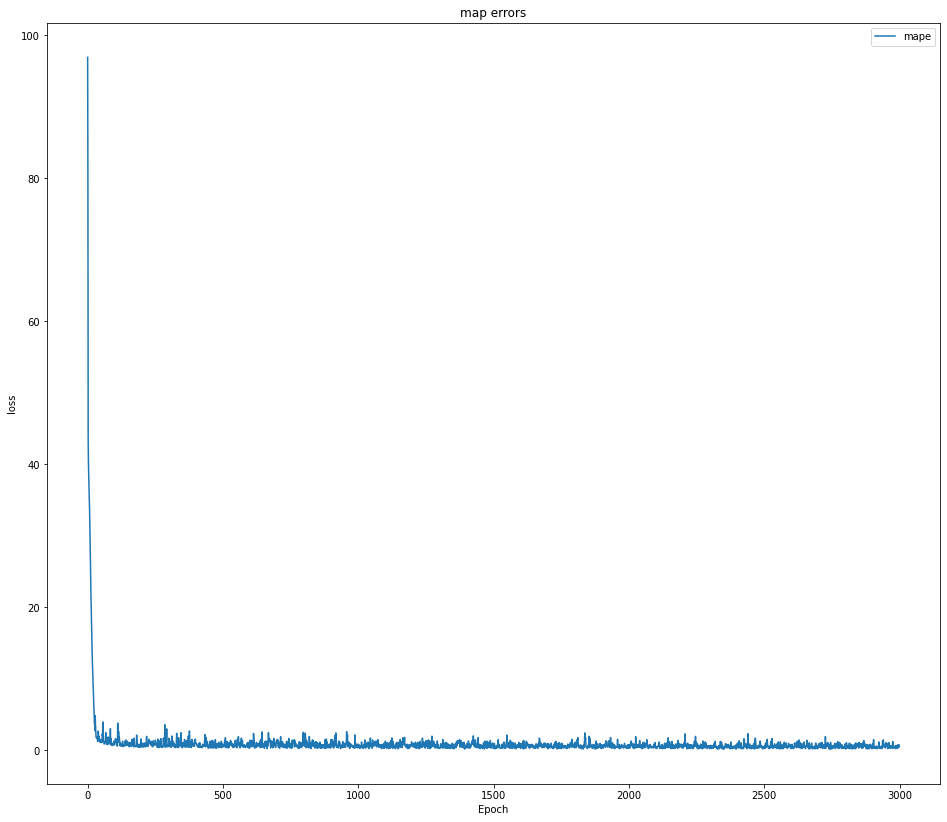

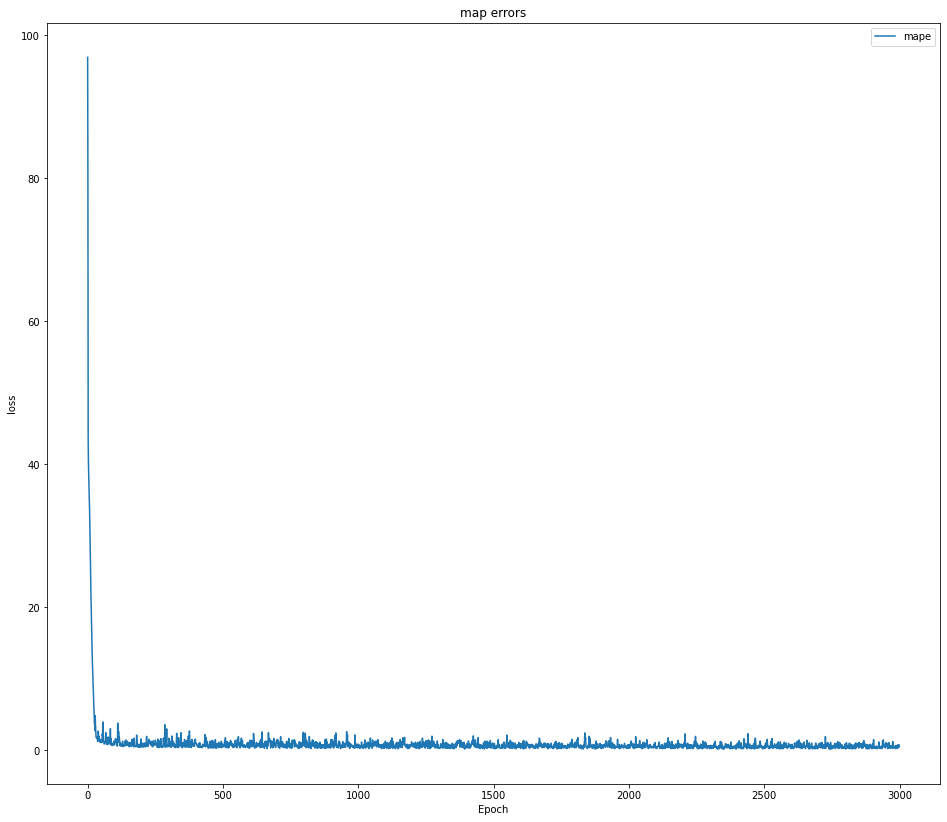

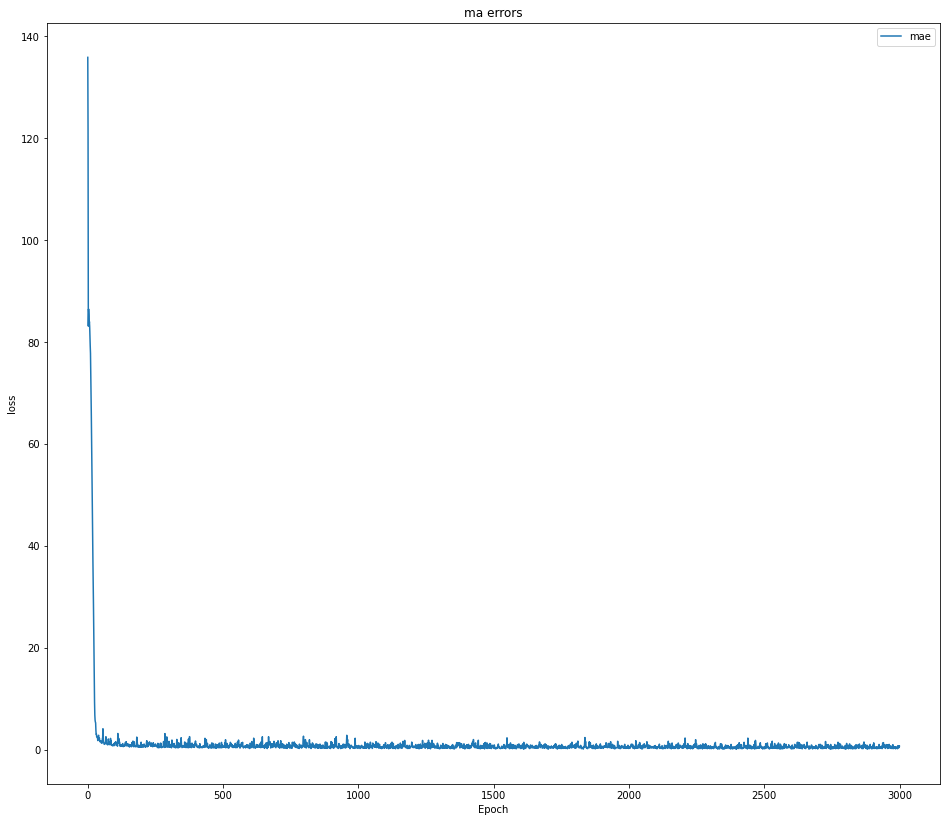

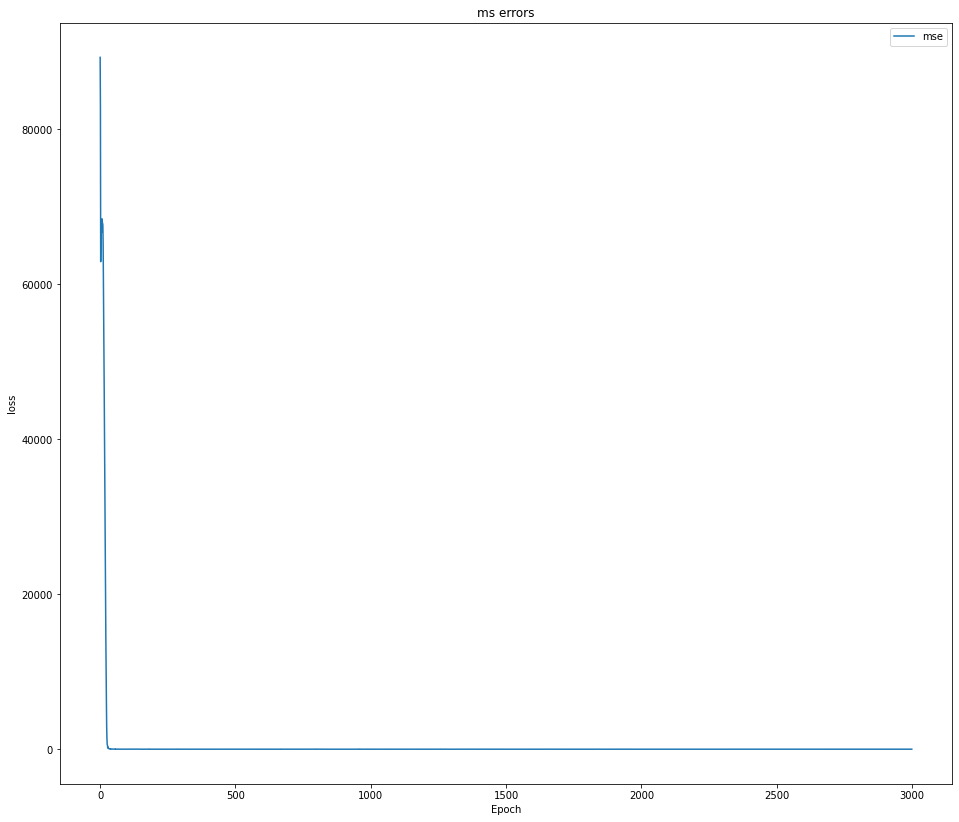

In [138]:
# Afficher les graphes d'accuracy et loss selon l'epoch
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(14, 12))
plt.plot(history_mean_state.history['loss'], label='Mean absolute percentege error')
plt.plot(history_mean_state.history['val_loss'], label='val Mean absolute percentege error')
plt.title('Mean absolute percentege error')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend()
# agrandir la taille de la figure
fig.set_size_inches(16, 14)
plt.show()

fig, ax = plt.subplots(figsize=(14, 12))
plt.plot(history_frequent.history['mae'], label='Mean absolute error')
plt.plot(history_frequent.history['val_mae'], label='val Mean absolute error')
plt.title('Mean absolute error')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend()
# agrandir la taille de la figure
fig.set_size_inches(16, 14)
plt.show()

fig, ax = plt.subplots(figsize=(14, 12))
plt.plot(history_frequent.history['mse'], label='Mean squared error')
plt.plot(history_frequent.history['val_mse'], label='val Mean squared error')
plt.title('Mean squared error')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend()
# agrandir la taille de la figure
fig.set_size_inches(16, 14)
plt.show()

fig, ax = plt.subplots(figsize=(14, 12))
plt.plot(history_frequent.history['val_loss'], label='mape')
plt.title('map errors')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend()
# agrandir la taille de la figure
fig.set_size_inches(16, 14)
plt.show()

fig, ax = plt.subplots(figsize=(14, 12))
plt.plot(history_frequent.history['val_loss'], label='mape')
plt.title('map errors')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend()
# agrandir la taille de la figure
fig.set_size_inches(16, 14)
plt.show()

fig, ax = plt.subplots(figsize=(14, 12))
plt.plot(history_frequent.history['val_mae'], label='mae')
plt.title('ma errors')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend()
# agrandir la taille de la figure
fig.set_size_inches(16, 14)
plt.show()

fig, ax = plt.subplots(figsize=(14, 12))
plt.plot(history_frequent.history['val_mse'], label='mse')
plt.title('ms errors')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend()
# agrandir la taille de la figure
fig.set_size_inches(16, 14)
plt.show()


In [ ]:
model.save('prediction_wqi_par_cnn_frequent_3000_epochs.h5')

# remplacer les valeurs manquantes par **le moyenne de chaque state**

In [3]:
# Load the dataset
df = pd.read_csv('water_quality_dataset_mean_state.csv')

In [4]:
# Split the dataset into input (X) and output (y) variables
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [5]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Standardize the input features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
# Reshape the input features for use with CNN
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [8]:
from keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dense, Dropout, LeakyReLU
from keras.models import Model
from keras.callbacks import ReduceLROnPlateau
from keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler

In [15]:
# Build the CNN model
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=1))
model.add(Conv1D(filters=64, kernel_size=2, activation='relu'))
model.add(MaxPooling1D(pool_size=1))
model.add(Conv1D(filters=128, kernel_size=2, activation='relu'))
model.add(MaxPooling1D(pool_size=1))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=1, activation='linear'))

In [18]:
# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_absolute_percentage_error',metrics=['mae','mse'])

In [40]:
import time

# Début du chrono
start_time_mean_state = time.time()
# Enregistrer les temps de départ
step_times = []

# Définir un callback pour mesurer les temps de chaque étape
class TimingCallback(tf.keras.callbacks.Callback):
    def on_train_batch_begin(self, batch, logs=None):
        self.start_time = time.time()

    def on_train_batch_end(self, batch, logs=None):
        step_time = time.time() - self.start_time
        step_times.append(step_time)
# Train the model
history_mean_state=model.fit(X_train, y_train, epochs=3000, batch_size=150, validation_data=(X_test, y_test),callbacks=[TimingCallback()])
# Fin du chrono
end_time_mean_state = time.time()

Streaming output truncated to the last 5000 lines.
9/9 [==============================] - 0s 17ms/step - loss: 0.2354 - mae: 0.2700 - mse: 0.3087 - val_loss: 0.1449 - val_mae: 0.1559 - val_mse: 0.0648
Epoch 502/3000
9/9 [==============================] - 0s 18ms/step - loss: 0.1834 - mae: 0.2173 - mse: 0.1700 - val_loss: 0.2849 - val_mae: 0.3307 - val_mse: 0.2724
Epoch 503/3000
9/9 [==============================] - 0s 22ms/step - loss: 0.1814 - mae: 0.2060 - mse: 0.1399 - val_loss: 0.0776 - val_mae: 0.0707 - val_mse: 0.0187
Epoch 504/3000
9/9 [==============================] - 0s 21ms/step - loss: 0.1791 - mae: 0.1940 - mse: 0.1595 - val_loss: 0.1432 - val_mae: 0.1677 - val_mse: 0.0885
Epoch 505/3000
9/9 [==============================] - 0s 19ms/step - loss: 0.1816 - mae: 0.2220 - mse: 0.2091 - val_loss: 0.1945 - val_mae: 0.1562 - val_mse: 0.0363
Epoch 506/3000
9/9 [==============================] - 0s 18ms/step - loss: 0.2132 - mae: 0.2492 - mse: 0.2380 - val_loss: 0.3744 - val_mae:

In [41]:
# Calcul de la durée d'entraînement en secondes
training_time_mean_state = end_time_mean_state - start_time_mean_state
# Affichage de la durée d'entraînement
print("Le temps d'entraînement est de", training_time_mean_state, "secondes")
# Evaluate the model
loss_mean_state = model.evaluate(X_test, y_test)
print('Mean absolute percentege error:', loss_mean_state[0])
print('Mean absolute error:', loss_mean_state[1])
print('Mean squared error:', loss_mean_state[2])

Le temps d'entraînement est de 690.7690010070801 secondes
11/11 [==============================] - 0s 3ms/step - loss: 0.1269 - mae: 0.1156 - mse: 0.0369
Mean absolute percentege error: 0.12688282132148743
Mean absolute error: 0.11561980843544006
Mean squared error: 0.036863867193460464


In [42]:
# Predict the WQI for a new sample
new_sample = np.array([[7.5, 8.0, 300, 2.0, 0.5, 100, 2005]])
new_sample = scaler.transform(new_sample)
new_sample = new_sample.reshape((new_sample.shape[0], new_sample.shape[1], 1))
prediction = model.predict(new_sample)
print('Predicted WQI:', prediction[0][0])

1/1 [==============================] - 0s 367ms/step
Predicted WQI: 72.0525


In [47]:
model.save('prediction_wqi_par_cnn_mean_state_3000_epochs_batch_150.h5')

*comparaison*

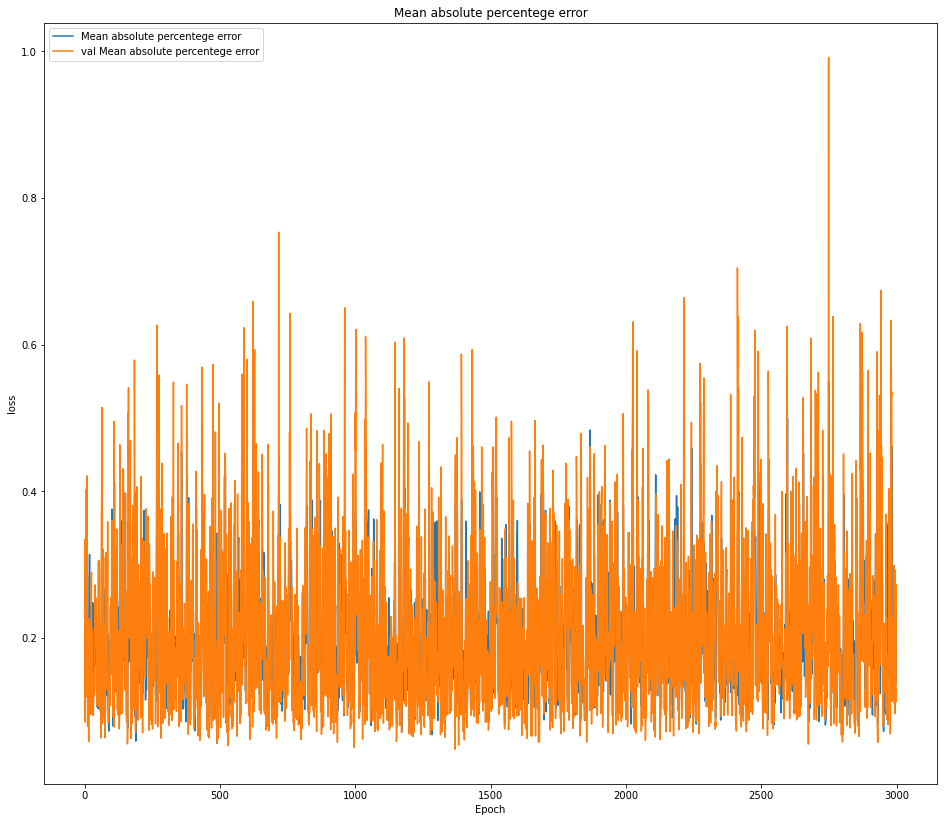

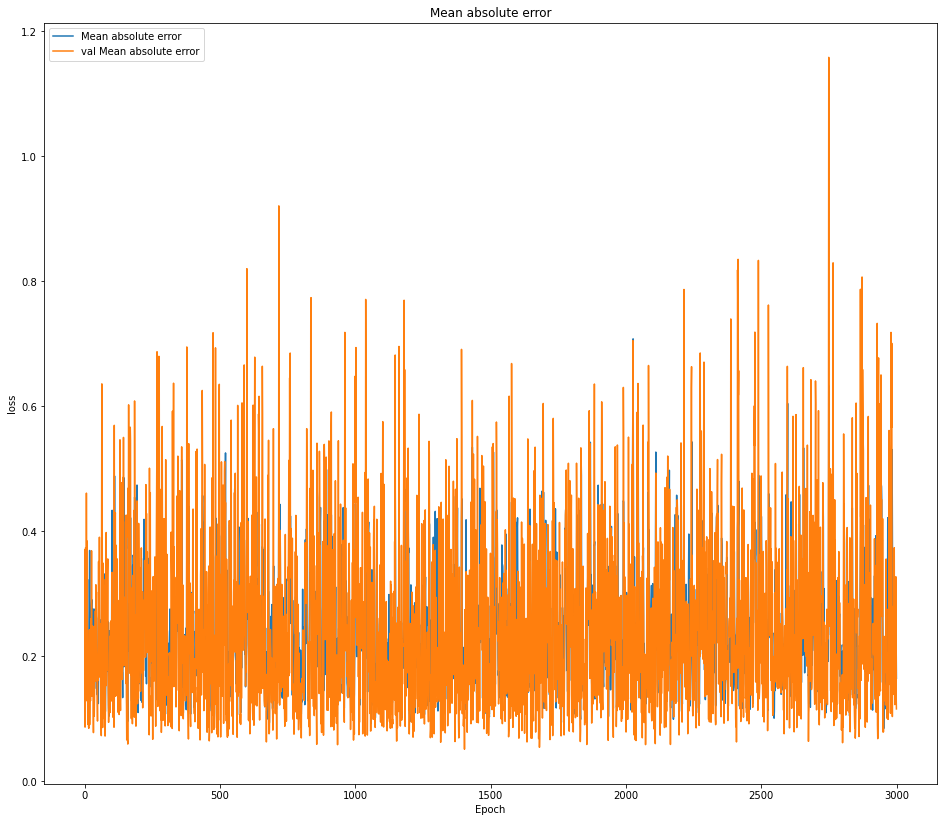

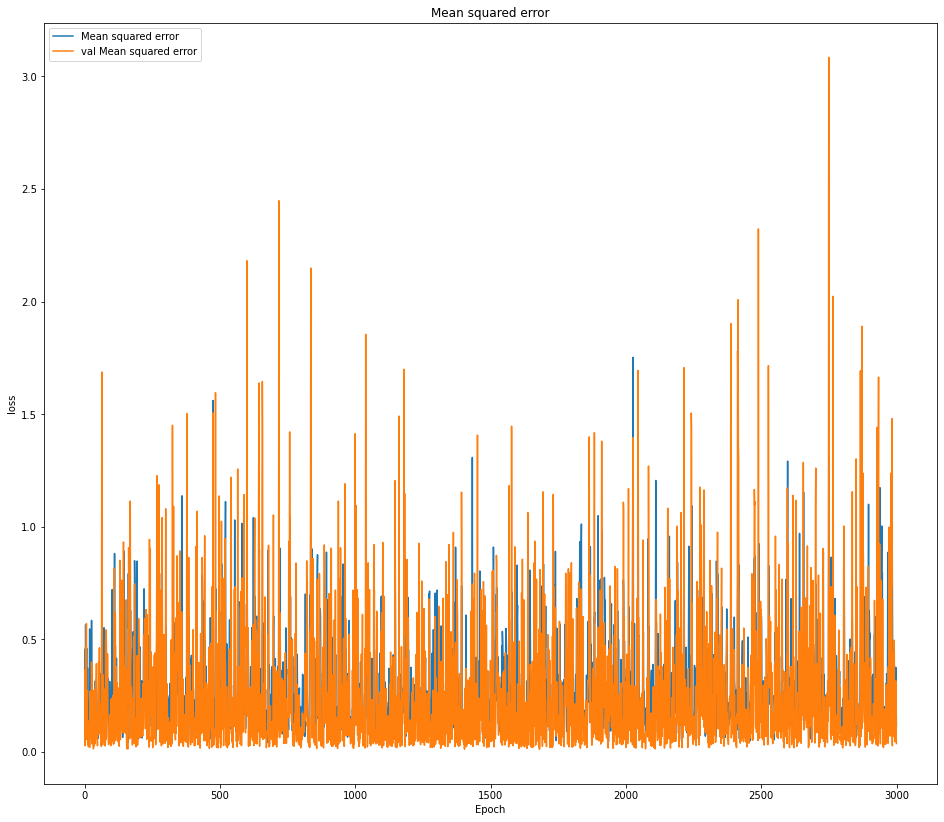

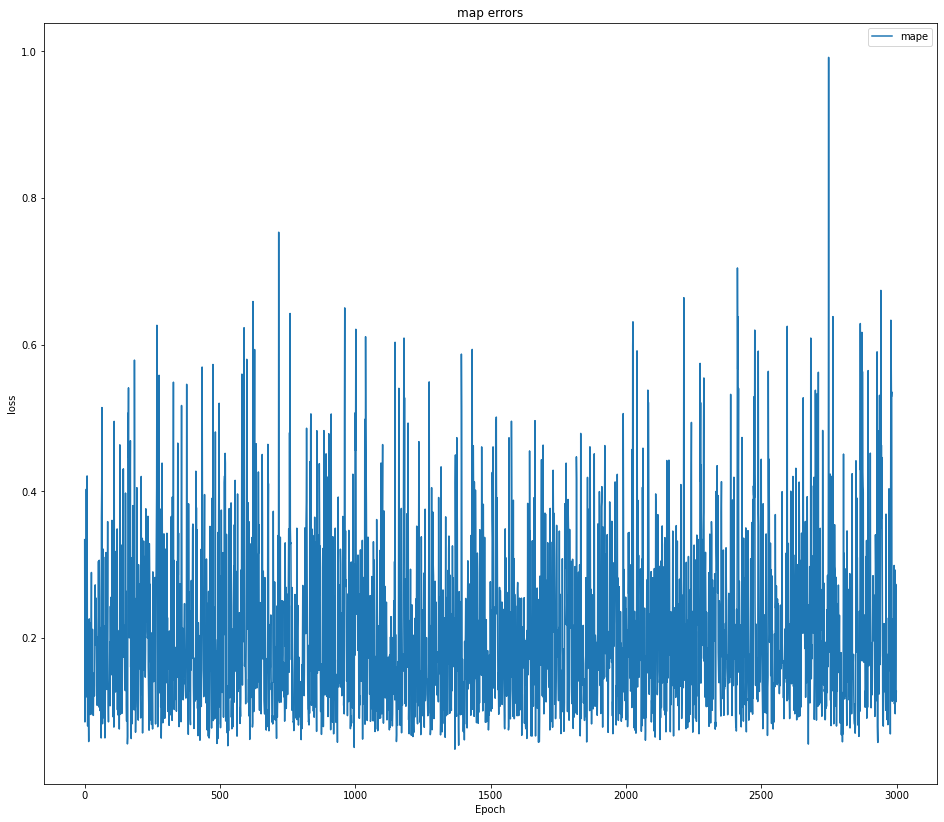

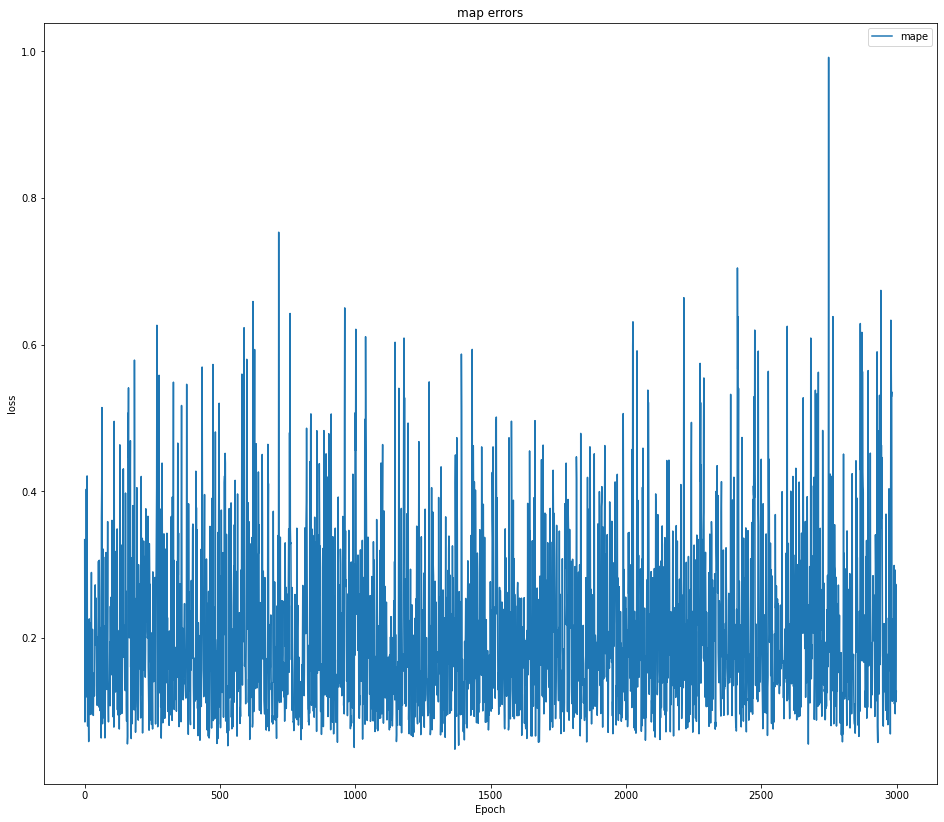

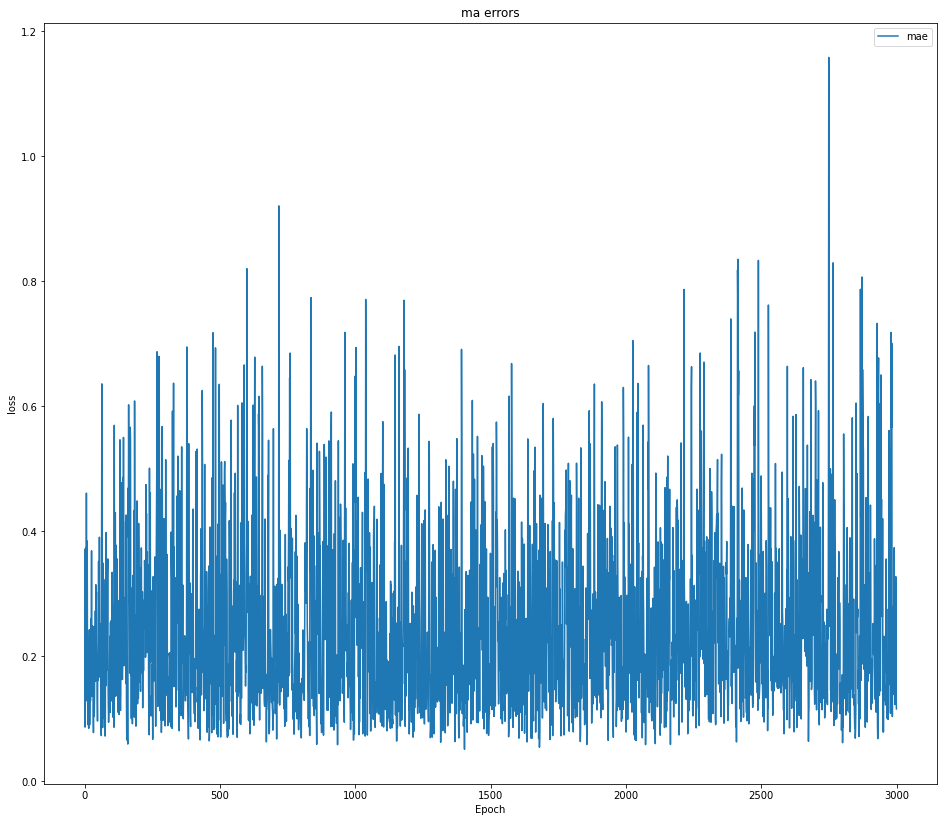

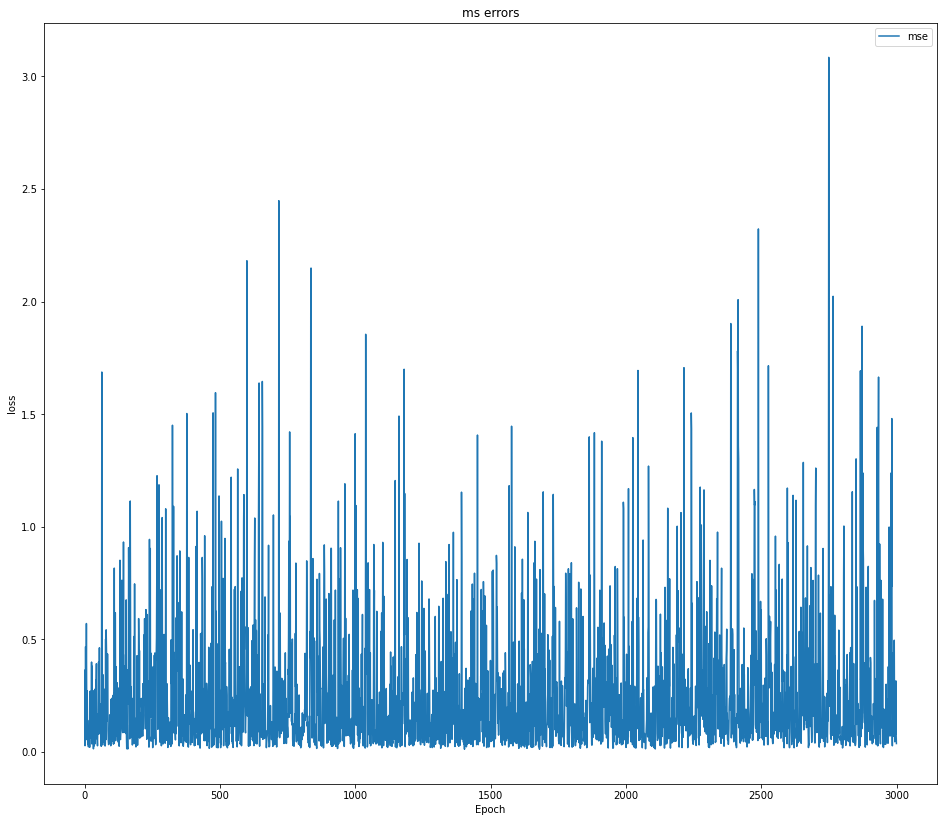

In [139]:
# Afficher les graphes d'accuracy et loss selon l'epoch
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(14, 12))
plt.plot(history_mean_state.history['loss'], label='Mean absolute percentege error')
plt.plot(history_mean_state.history['val_loss'], label='val Mean absolute percentege error')
plt.title('Mean absolute percentege error')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend()
# agrandir la taille de la figure
fig.set_size_inches(16, 14)
plt.show()

fig, ax = plt.subplots(figsize=(14, 12))
plt.plot(history_mean_state.history['mae'], label='Mean absolute error')
plt.plot(history_mean_state.history['val_mae'], label='val Mean absolute error')
plt.title('Mean absolute error')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend()
# agrandir la taille de la figure
fig.set_size_inches(16, 14)
plt.show()

fig, ax = plt.subplots(figsize=(14, 12))
plt.plot(history_mean_state.history['mse'], label='Mean squared error')
plt.plot(history_mean_state.history['val_mse'], label='val Mean squared error')
plt.title('Mean squared error')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend()
# agrandir la taille de la figure
fig.set_size_inches(16, 14)
plt.show()

fig, ax = plt.subplots(figsize=(14, 12))
plt.plot(history_mean_state.history['val_loss'], label='mape')
plt.title('map errors')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend()
# agrandir la taille de la figure
fig.set_size_inches(16, 14)
plt.show()

fig, ax = plt.subplots(figsize=(14, 12))
plt.plot(history_mean_state.history['val_loss'], label='mape')
plt.title('map errors')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend()
# agrandir la taille de la figure
fig.set_size_inches(16, 14)
plt.show()

fig, ax = plt.subplots(figsize=(14, 12))
plt.plot(history_mean_state.history['val_mae'], label='mae')
plt.title('ma errors')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend()
# agrandir la taille de la figure
fig.set_size_inches(16, 14)
plt.show()

fig, ax = plt.subplots(figsize=(14, 12))
plt.plot(history_mean_state.history['val_mse'], label='mse')
plt.title('ms errors')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend()
# agrandir la taille de la figure
fig.set_size_inches(16, 14)
plt.show()
